<div style="text-align:center;">
<img src="https://www.widsworldwide.org/wp-content/uploads/2023/09/WiDS_Logo_Mobile.png" alt="Logo" width="600" height="400">

# WiDS Datathon 2024 Challenge #1
# **Bridging Healthcare Gaps: Predicting Timely Treatment**🩺

</div>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

In this notebook, we embark on a journey to address one of the most critical challenges in healthcare today - ensuring equitable access to timely cancer diagnosis and treatment.

### <b><span style='color:#FFCE30'> 1.1 |</span> Background: Equity in Healthcare</b>
Women in Data Science (WiDS) Worldwide has embarked on a mission to increase the participation of women in data science, recognizing the profound societal impact it can bring. Healthcare inequity, a pervasive global issue, particularly affects women's health, which is fundamental for the well-being of societies and economies. This datathon aims to unveil disparities in cancer treatment, examining the multifaceted factors that contribute to these disparities, including demographics and societal influences.

### <b><span style='color:#FFCE30'> 1.2 |</span> The Challenge Ahead</b>
Our primary task revolves around predicting whether patients received a metastatic cancer diagnosis within 90 days of screening. Metastatic Triple-Negative Breast Cancer (TNBC) demands swift and precise intervention, and any delay in diagnosis and treatment can be catastrophic. Identifying variations in treatment access serves as a vital proxy to uncover healthcare inequalities.



Metastatic Triple-Negative Breast Cancer (TNBC) is a specific subtype of breast cancer that is characterized by the absence of three specific receptors on the surface of cancer cells: estrogen receptor (ER), progesterone receptor (PR), and human epidermal growth factor receptor 2 (HER2). 

- **Definition:** TNBC is classified as "triple-negative" because it lacks these receptors, making it different from other types of breast cancer. It accounts for approximately 10-15% of all breast cancer cases.

- **Metastatic Stage:** Metastatic TNBC refers to breast cancer that has spread to other parts of the body, such as the lungs, liver, bones, or brain. Metastatic breast cancer is often more challenging to treat than early-stage breast cancer.

- **Treatment:** Treatment for metastatic TNBC typically includes chemotherapy, targeted therapies, immunotherapy, and in some cases, radiation therapy or surgery to manage symptoms. The choice of treatment depends on the patient's specific case and the extent of metastasis.

- **Prognosis:** The prognosis for metastatic TNBC can vary widely depending on factors such as the extent of metastasis, the response to treatment, and overall health. Survival rates tend to be lower compared to other breast cancer subtypes.

More info: https://www.lbbc.org/about-breast-cancer/types-breast-cancer/metastatic-breast-cancer/metastatic-triple-negative


<img src="https://www.mdpi.com/pharmaceuticals/pharmaceuticals-15-00542/article_deploy/html/images/pharmaceuticals-15-00542-g001.png" alt="TNBC Illustration" width="800" height="400">

Source: Chaudhuri A, Kumar DN, Dehari D, Singh S, Kumar P, Bolla PK, Kumar D, Agrawal AK. Emergence of Nanotechnology as a Powerful Cavalry against Triple-Negative Breast Cancer (TNBC). Pharmaceuticals. 2022; 15(5):542. https://doi.org/10.3390/ph15050542 

### <b><span style='color:#FFCE30'> 1.3 |</span> The Goals</b>
As data scientists, our goals extend beyond predictions. We aim to build models that not only predict outcomes but also unravel the intricate relationship between patient demographics and timely treatment. Furthermore, we seek to understand the influence of environmental hazards on proper diagnosis and treatment, contributing to a comprehensive perspective on healthcare disparities.

This notebook will attempt to navigate the challenging terrain of data science and healthcare equity. Let's embark on this journey to bridge healthcare gaps, one prediction at a time.

### <b><span style='color:#FFCE30'> 1.4 |</span> The Goals</b>

In this V2 copy, we will merge the competition data set with external datasets in an attempt to achieve a Public LB score of > 0.806

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>IMPORT + LOAD DATA</b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/training.csv")
test = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/test.csv")
sample_submission = pd.read_csv("/kaggle/input/widsdatathon2024-challenge1/sample_submission.csv")

In [3]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.62

In [4]:
#all columns linked to geo-demographic
train.columns[13:82]
geo_demo_list = train.columns[13:82].tolist()
geo_demo_list

['Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_

In [5]:
df_hosp = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/us_hospital_locations.csv")
df_phys = pd.read_csv("/kaggle/input/us-hospital-and-physician-by-zipcode/National_Downloadable_File_2018.csv")

In [6]:
df_hosp.head()

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,CLOSED,49,KINGS,06031,USA,36.336159,-119.645667,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2016/02/04 00:00:00,IMAGERY/OTHER,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,OPEN,62,VENTURA,06111,USA,34.154939,-118.815736,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2019/08/02 00:00:00,IMAGERY/OTHER,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,OPEN,127,LOS ANGELES,06037,USA,34.023647,-118.184165,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2019/08/02 00:00:00,IMAGERY/OTHER,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
3,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,(323) 462-2271,GENERAL ACUTE CARE,OPEN,100,LOS ANGELES,06037,USA,34.096391,-118.325235,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2019/08/02 00:00:00,IMAGERY/OTHER,2014/02/10 00:00:00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
4,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,OPEN,95,LOS ANGELES,06037,USA,34.063039,-117.967438,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2019/08/02 00:00:00,IMAGERY/OTHER,2014/02/10 00:00:00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N


In [7]:
df_phys.head()

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,assgn,PQRS,EHR,MHI
0,1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,NaN,NaN,M,NaN,OTHER,1994.0,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,COMMONWEALTH HOSPITALIST GROUP LLC,4.587979e+09,57.0,1900 ELECTRIC RD,NaN,NaN,SALEM,VA,241537474,5.407764e+09,490126.0,LEWISGALE HOSPITAL ALLEGHANY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
1,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,2100 PFINGSTEN RD,NaN,NaN,GLENVIEW,IL,600261301,NaN,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
2,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,2180 PFINGSTEN RD 1ST FLOOR,NaN,Y,GLENVIEW,IL,600261301,NaN,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
3,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,777 PARK W AVE,NaN,NaN,HIGHLAND PARK,IL,600352433,8.474328e+09,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
4,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,777 PARK AVE W,NaN,NaN,HIGHALND PARK,IL,600352433,NaN,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3A |</span></b> <b>DATA PREPROCESSING</b></div>

In [8]:
# Filter dataframe to include only rows where STATUS is 'OPEN'
df_open = df_hosp[df_hosp['STATUS'] == 'OPEN']

# Extract the first 3 digits of ZIP
df_open['patient_zip3'] = df_open['ZIP'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of hospitals in each group
hospital_counts_by_zip3 = df_open.groupby('patient_zip3').size().reset_index(name='Hospital_Count')

hospital_counts_by_zip3

,patient_zip3,Hospital_Count
0,100,26
1,103,5
2,104,15
3,105,13
4,106,6
...,...,...
821,995,14
822,996,6
823,997,6
824,998,4


In [9]:
df_phys.head()

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,Grd_yr,pri_spec,sec_spec_1,sec_spec_2,sec_spec_3,sec_spec_4,sec_spec_all,org_nm,org_pac_id,num_org_mem,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,hosp_afl_1,hosp_afl_lbn_1,hosp_afl_2,hosp_afl_lbn_2,hosp_afl_3,hosp_afl_lbn_3,hosp_afl_4,hosp_afl_lbn_4,hosp_afl_5,hosp_afl_lbn_5,assgn,PQRS,EHR,MHI
0,1003000126,7517003643,I20150824000105,ENKESHAFI,ARDALAN,NaN,NaN,M,NaN,OTHER,1994.0,INTERNAL MEDICINE,NaN,NaN,NaN,NaN,NaN,COMMONWEALTH HOSPITALIST GROUP LLC,4.587979e+09,57.0,1900 ELECTRIC RD,NaN,NaN,SALEM,VA,241537474,5.407764e+09,490126.0,LEWISGALE HOSPITAL ALLEGHANY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
1,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,2100 PFINGSTEN RD,NaN,NaN,GLENVIEW,IL,600261301,NaN,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
2,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,2180 PFINGSTEN RD 1ST FLOOR,NaN,Y,GLENVIEW,IL,600261301,NaN,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
3,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,777 PARK W AVE,NaN,NaN,HIGHLAND PARK,IL,600352433,8.474328e+09,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
4,1003000134,4284706367,I20080707000385,CIBULL,THOMAS,L,NaN,M,NaN,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2003.0,PATHOLOGY,NaN,NaN,NaN,NaN,NaN,NORTHSHORE UNIVERSITY HEALTHSYSTEM FACULTY PRA...,2.163335e+09,1188.0,777 PARK AVE W,NaN,NaN,HIGHALND PARK,IL,600352433,NaN,140010.0,NORTHSHORE UNIVERSITY HEALTHSYSTEM - EVANSTON ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN


In [10]:
df_phys.columns

Index(['NPI', ' Ind_PAC_ID', ' Ind_enrl_ID', ' lst_nm', ' frst_nm', ' mid_nm',
       ' suff', ' gndr', ' Cred', ' Med_sch', ' Grd_yr', ' pri_spec',
       ' sec_spec_1', ' sec_spec_2', ' sec_spec_3', ' sec_spec_4',
       ' sec_spec_all', ' org_nm', ' org_pac_id', ' num_org_mem', ' adr_ln_1',
       ' adr_ln_2', ' ln_2_sprs', ' cty', ' st', ' zip', ' phn_numbr',
       ' hosp_afl_1', ' hosp_afl_lbn_1', ' hosp_afl_2', ' hosp_afl_lbn_2',
       ' hosp_afl_3', ' hosp_afl_lbn_3', ' hosp_afl_4', ' hosp_afl_lbn_4',
       ' hosp_afl_5', ' hosp_afl_lbn_5', ' assgn', ' PQRS', ' EHR', ' MHI'],
      dtype='object')

In [11]:
# Filter dataframe to include only rows where pri_spec contains 'oncology'
df_oncology = df_phys[df_phys[' pri_spec'].str.contains('oncology', case=False, na=False)]

# Extract the first 3 digits of ZIP
df_oncology['patient_zip3'] = df_oncology[' zip'].astype(str).str[:3]

# Group by the first 3 digits of ZIP and count the number of physicians in each group
physician_counts_by_zip3 = df_oncology.groupby('patient_zip3').size().reset_index(name='Physician_Count')

physician_counts_by_zip3


,patient_zip3,Physician_Count
0,006,16
1,007,11
2,008,1
3,009,14
4,010,2
...,...,...
854,995,71
855,996,18
856,997,6
857,998,4


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3B |</span></b> <b>FEATURE ENGINEERING</b></div>


### <b><span style='color:#FFCE30'> 3.1 |</span> Exploratory Data Analysis</b>
We reference to the following notebook for extensive work done on EDA and modelling:

- https://www.kaggle.com/code/waleedabujaish/wids-starter-0-805-lb
- https://www.kaggle.com/code/ddosad/wids-data-exploration
- https://www.kaggle.com/code/aerdem4/wids-2024-lofo-feature-importance
- https://www.kaggle.com/code/vrushalimanka/wids-datathon-eda-baseline-model
- https://www.kaggle.com/code/ravi20076/wids2024challenge1-baseline-v1
- https://www.kaggle.com/code/farzonaeraj/equity-in-healthcare-eda-baseline-model

In [12]:
# Convert 'ZIP_3' column to integers in physician_counts_by_zip3 DataFrame
physician_counts_by_zip3['patient_zip3'] = physician_counts_by_zip3['patient_zip3'].astype(int)

# Convert 'ZIP_3' column to integers in hospital_counts_by_zip3 DataFrame
hospital_counts_by_zip3['patient_zip3'] = hospital_counts_by_zip3['patient_zip3'].astype(int)


In [13]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')

# Merge physician_counts_by_zip3 with train data on 'patient_zip3'
train = train.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')


In [14]:
train['Hospital_Count'] = train['Hospital_Count'].fillna(0)
train['Physician_Count'] = train['Physician_Count'].fillna(0)


In [15]:
# Merge hospital_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(hospital_counts_by_zip3[['patient_zip3', 'Hospital_Count']], on='patient_zip3', how='left')
# physician_counts_by_zip3 with train data on 'patient_zip3'
test = test.merge(physician_counts_by_zip3[['patient_zip3', 'Physician_Count']], on='patient_zip3', how='left')

In [16]:
test['Hospital_Count'] = test['Hospital_Count'].fillna(0)
test['Physician_Count'] = test['Physician_Count'].fillna(0)

In [17]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,3941.00,28.98,5.70,14.00,24.66,28.19,32.92,85.00
population,12905.00,20744.44,13886.90,635.55,9463.90,19154.19,30021.28,71374.13
density,12905.00,1581.95,2966.31,0.92,171.86,700.34,1666.52,21172.00
age_median,12905.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12905.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12905.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [18]:
#Categorical Columns
train.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,6521,5,White,3588
payer_type,11103,3,COMMERCIAL,6032
patient_state,12855,50,CA,2438
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,24,2,PEMBROLIZUMAB,13
metastatic_first_novel_treatment_type,24,1,Antineoplastics,24
Region,12854,4,South,3919


In [19]:
#Font setting
ORANGE, BOLD, RESET = '\033[93m', '\033[1m', '\033[0m'

In [20]:
print(f"The data consists of {BOLD}{ORANGE}{train.shape[0]}{RESET} rows, and {BOLD}{ORANGE}{train.shape[1]}{RESET} columns")

The data consists of 12906 rows, and 85 columns


In [21]:
#Let's see how much are the missing values from the datset

total_missing = train.isnull().sum().sum()
total_cells = train.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{ORANGE}{total_missing}{RESET},\
which is {BOLD}{ORANGE}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 43292,which is 3.95% of total data.


In [22]:
# Lets check count & % of missing values in the dataset
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{ORANGE}{train[column].isna().sum()}{RESET} missing values, which is {BOLD}{ORANGE}{missing_percentage:.2f}%{RESET} of the column.")

metastatic_first_novel_treatment has 12882 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 12882 missing values, which is 99.81% of the column.
bmi has 8965 missing values, which is 69.46% of the column.
patient_race has 6385 missing values, which is 49.47% of the column.
payer_type has 1803 missing values, which is 13.97% of the column.
Region has 52 missing values, which is 0.40% of the column.
Division has 52 missing values, which is 0.40% of the column.
patient_state has 51 missing values, which is 0.40% of the column.
N02 has 29 missing values, which is 0.22% of the column.
PM25 has 29 missing values, which is 0.22% of the column.
Ozone has 29 missing values, which is 0.22% of the column.
self_employed has 4 missing values, which is 0.03% of the column.
farmer has 4 missing values, which is 0.03% of the column.
home_value has 4 missing values, which is 0.03% of the column.
rent_median has 4 missing values, which is 0.03% of the column.
rent

We can drop columns with the highest null values %:
- Patient_race, 
- Payer_type, 
- bmi,
- metastatic_first_novel_treatment,
- metastatic_first_novel_treatment_type

### <b><span style='color:#FFCE30'> 3.2 |</span> Transformers using classes </b>

In [23]:
# Import Library to build custom machine learning models or transformers using scikit-learn. 
from sklearn.base import BaseEstimator, TransformerMixin

## Text Preprocessor

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [26]:
train.breast_cancer_diagnosis_desc.unique()

array(['Malignant neoplasm of unsp site of unspecified female breast',
       'Malig neoplm of upper-outer quadrant of right female breast',
       'Malignant neoplasm of central portion of left female breast',
       'Malig neoplasm of upper-inner quadrant of left female breast',
       'Malignant neoplasm of breast (female), unspecified',
       'Malignant neoplasm of unspecified site of left female breast',
       'Malig neoplasm of lower-outer quadrant of left female breast',
       'Malignant neoplasm of upper-outer quadrant of female breast',
       'Malig neoplasm of upper-outer quadrant of left female breast',
       'Malignant neoplasm of ovrlp sites of left female breast',
       'Malignant neoplasm of unsp site of right female breast',
       'Malig neoplasm of lower-inner quadrant of left female breast',
       'Malig neoplm of lower-inner quadrant of right female breast',
       'Malignant neoplasm of central portion of right female breast',
       'Malignant neoplasm of c

In [27]:
import re

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.replacement_dict = {
            'Malig': 'malignant',
            'neoplasm': 'neoplasms',
            'neoplm': 'neoplasms',
            'overlapping': 'overlap',
            'ovrlp':'overlap',
            'site': 'sites',
            'unsp': 'unspecified'
        }
        
    def fit(self, X, y=None):
        # Fit the TF-IDF vectorizer on the processed text
        processed_text = self._process_text(X[self.columns[0]])
        self.vectorizer.fit(processed_text)
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for column in self.columns:
            processed_text = self._process_text(X_copy[column])
            # Transform the processed text using TF-IDF vectorizer
            tfidf_features = self.vectorizer.transform(processed_text)
            # Convert sparse matrix to array and then to DataFrame
            tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=self.vectorizer.get_feature_names_out())
            # Prepend 'text_' prefix to the column names
            tfidf_df.columns = ['text_' + col for col in tfidf_df.columns]
            # Concatenate the DataFrame with the original X_copy DataFrame
            X_copy = pd.concat([X_copy, tfidf_df], axis=1)
        return X_copy
    
    def _process_text(self, texts):
        processed_texts = []
        for text in texts:
            # Apply text replacement
            for old_word, new_word in self.replacement_dict.items():
                text = re.sub(r'\b{}\b'.format(old_word), new_word, text)
            # Convert text to lowercase
            text = text.lower()
            # Remove non-alphanumeric characters and extra whitespaces
            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
            # Remove extra whitespaces
            text = re.sub(r'\s+', ' ', text).strip()
            processed_texts.append(text)
        return processed_texts


TextPreprocessor(columns=['breast_cancer_diagnosis_desc']).fit_transform(train) 

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,text_areola,text_axillary,text_breast,text_central,text_female,text_left,text_lowerinner,text_lowerouter,text_male,text_malignant,text_neoplasms,text_nipple,text_overlap,text_portion,text_quadrant,text_right,text_secondary,text_sites,text_specified,text_tail,text_unspecified,text_upperinner,text_upperouter
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,0.0,0.0,0.242252,0.000000,0.242590,0.000000,0.0,0.0,0.0,0.242233,0.242233,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.415967,0.0,0.0,0.769469,0.000000,0.000000
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,0.0,0.0,0.219129,0.000000,0.219434,0.000000,0.0,0.0,0.0,0.219112,0.219112,0.0,0.0,0.000000,0.486977,0.463183,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.596763
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.5600

In [28]:
# class TextPreprocessor(BaseEstimator, TransformerMixin):
#     def __init__(self, columns):
#         self.columns = columns
#         self.stop_words = set(stopwords.words('english'))
#         self.stemmer = PorterStemmer()
#         self.vectorizer = TfidfVectorizer()
        
#     def fit(self, X, y=None):
#         # Preprocess and fit the TF-IDF vectorizer on the processed text of the train data
#         processed_text = self._process_text(X[self.columns[0]])
#         self.vectorizer.fit(processed_text)
#         return self
    
#     def transform(self, X):
#         X_copy = X.copy()
#         for column in self.columns:
#             # Preprocess the text columns of both train and test data
#             processed_text = self._process_text(X_copy[column])
#             # Transform the processed text using the pre-fitted TF-IDF vectorizer
#             tfidf_features = self.vectorizer.transform(processed_text)
#             # Convert sparse matrix to DataFrame
#             tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=self.vectorizer.get_feature_names_out())
#             # Prepend 'text_' prefix to the column names
#             tfidf_df.columns = ['text_' + col for col in tfidf_df.columns]
#             # Concatenate the DataFrame with the original X_copy DataFrame
#             X_copy = pd.concat([X_copy, tfidf_df], axis=1)
#         return X_copy
    
#     def _process_text(self, texts):
#         processed_texts = []
#         for text in texts:
#             if pd.isnull(text):
#                 text = ''  # Handle missing values by replacing them with an empty string
#             tokens = word_tokenize(text.lower())
#             filtered_tokens = [token for token in tokens if token not in self.stop_words]
#             stemmed_tokens = [self.stemmer.stem(token) for token in filtered_tokens]
#             processed_text = ' '.join(stemmed_tokens)
#             processed_texts.append(processed_text)
#         return processed_texts

    
# TextPreprocessor(columns=['breast_cancer_diagnosis_desc']).fit_transform(train)

In [29]:
from sklearn.decomposition import PCA

class TFIDFPCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column, max_features=1000, n_components=5):
        self.column = column
        self.max_features = max_features
        self.n_components = n_components
        self.vectorizer = TfidfVectorizer(max_features=max_features)
        self.pca = PCA(n_components=n_components)
        
    def fit(self, X, y=None):
        text_data = X[self.column]
        self.vectorizer.fit(text_data)
        tfidf_features = self.vectorizer.transform(text_data)
        self.pca.fit(tfidf_features.toarray())
        return self
    
    def transform(self, X):
        text_data = X[self.column]
        tfidf_features = self.vectorizer.transform(text_data)
        pca_features = self.pca.transform(tfidf_features.toarray())
        
        # Create a DataFrame for the PCA features
        pca_df = pd.DataFrame(pca_features, columns=[f'{self.column}_tfidf_pca_{i}' for i in range(self.n_components)])
        
        # Concatenate the PCA DataFrame with the original DataFrame
        X = pd.concat([X, pca_df], axis=1)
        
        return X
    
TFIDFPCATransformer(column='breast_cancer_diagnosis_desc', max_features=1000, n_components=5).fit_transform(train) 

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,breast_cancer_diagnosis_desc_tfidf_pca_0,breast_cancer_diagnosis_desc_tfidf_pca_1,breast_cancer_diagnosis_desc_tfidf_pca_2,breast_cancer_diagnosis_desc_tfidf_pca_3,breast_cancer_diagnosis_desc_tfidf_pca_4
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,-0.446357,0.178124,-0.200344,-0.008199,-0.057879
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,0.734232,0.113773,-0.165122,-0.201276,-0.090653
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.39491

## Drop Columns

In [30]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        
        return X.drop(self.cols, axis=1)

DropColumn(cols=['patient_race', 'payer_type', 'bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']).fit_transform(train)

,patient_id,patient_state,patient_zip3,patient_age,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count
0,475714,CA,924,84,F,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0
1,349367,CA,928,62,F,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0
2,138632,TX,760,43,F,C50112,Malignant neoplasm of central portion of left ...,C773,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0
3,617843,CA,926,45,F,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,8.216667,4.759524,49.066667,50.933333,52.604762,11.623810,31.142857,4.623810,3.098095,54.564286,120533.83330,3.435714,1.273810,2.180952,2.211905,2.100000,4.380952,5.885714,10.897619,10.721429,18.850000,38.057143,56.907143,553

## Handle Missing Data

In [31]:
class MissingDataImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='median', columns=None):
        self.strategy = strategy
        self.columns = columns

    def fit(self, X, y=None):
        if self.strategy == 'median':
            if self.columns is not None:
                self.fill_values = X[self.columns].median()
            else:
                self.fill_values = X.mean()
        elif self.strategy == 'mode':
            if self.columns is not None:
                self.fill_values = X[self.columns].mode().iloc[0]
            else:
                self.fill_values = X.mode().iloc[0]
        return self

    def transform(self, X):
        if self.columns is not None:
            X_copy = X.copy()
            X_copy[self.columns] = X_copy[self.columns].fillna(self.fill_values)
            return X_copy
        else:
            return X.fillna(self.fill_values)

In [32]:
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('DiagPeriodL90D')

In [33]:
categorical_cols

Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')

In [34]:
# Initialize the MeanImputer with numerical_cols for mean imputation
median_imputer = MissingDataImputer(strategy='median', columns=numerical_cols)

# Fit and transform the train and test data using the specified numerical columns
df_train_median = median_imputer.fit_transform(train)

In [35]:
df_train_median.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
patient_id,12906.00,547381.20,260404.96,100063.00,321517.00,543522.00,772671.75,999896.00
patient_zip3,12906.00,573.75,275.45,101.00,331.00,554.00,846.00,999.00
patient_age,12906.00,59.18,13.34,18.00,50.00,59.00,67.00,91.00
bmi,12906.00,28.43,3.17,14.00,28.19,28.19,28.19,85.00
population,12906.00,20744.32,13886.37,635.55,9463.90,19154.19,30021.28,71374.13
density,12906.00,1581.88,2966.20,0.92,171.86,700.34,1666.52,21172.00
age_median,12906.00,40.50,4.04,20.60,37.13,40.64,42.93,54.57
age_under_10,12906.00,11.12,1.51,0.00,10.16,11.04,12.19,17.68
age_10_to_19,12906.00,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12906.00,13.29,3.35,5.92,11.01,12.54,14.97,62.10


In [36]:
# Initialize the ModeImputer with categorical_cols for mode imputation
mode_imputer = MissingDataImputer(strategy='mode', columns=categorical_cols)

# Fit and transform the train and test data using the specified categorical columns
df_train_mode = mode_imputer.fit_transform(train)

In [37]:
#Categorical Columns
df_train_mode.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
patient_race,12906,5,White,9973
payer_type,12906,3,COMMERCIAL,7835
patient_state,12906,50,CA,2489
patient_gender,12906,1,F,12906
breast_cancer_diagnosis_code,12906,50,1749,1982
breast_cancer_diagnosis_desc,12906,50,"Malignant neoplasm of breast (female), unspeci...",1982
metastatic_cancer_diagnosis_code,12906,43,C773,7052
metastatic_first_novel_treatment,12906,2,PEMBROLIZUMAB,12895
metastatic_first_novel_treatment_type,12906,1,Antineoplastics,12906
Region,12906,4,South,3971


## One Hot Encoder

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
#applies transformers to different columns.
multicolumn_prep = ColumnTransformer([ ('encode', 
                                       OneHotEncoder(handle_unknown='ignore'), 
                                       categorical_cols),
                                     ],
                                     remainder='passthrough')

multicolumn_prep


ColumnTransformer(remainder='passthrough',
                  transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object'))])

## Replace Doubleunderscores
Use a custom transformer to replace double __ columns which could create problem e.g (JSON error when running LGBM model)

In [40]:
# Define a custom transformer to replace double underscores with a single underscore
class ReplaceDoubleUnderscores:
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = X_copy.columns.str.replace('__', '_')
        return X_copy

## Rename Columns
Use a custom transformer to rename columns which could create problem e.g (JSON error when running LGBM model)

In [41]:
class RenameColumns(BaseEstimator, TransformerMixin):
    def __init__(self, replace_dict):
        self.replace_dict = replace_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.columns = [col.translate(self.replace_dict) for col in X_copy.columns]
        return X_copy

In [42]:
replace_dict = {ord('['): '_', ord(']'): '_', ord(':'): '_', ord(' '): '_', ord('('): '_', ord(')'): '_', ord(','): '_'}

## Patient_age Binning

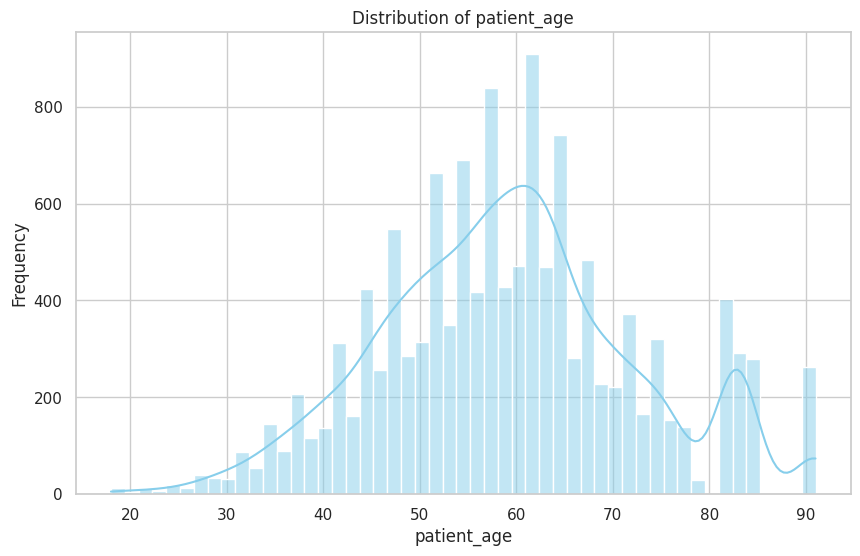

In [43]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create the distribution plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(train['patient_age'], kde=True, color='skyblue')  # Create the distplot with KDE
plt.title('Distribution of patient_age')  # Set the title of the plot
plt.xlabel('patient_age')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Show the plot

In [44]:
class PAgeBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['patient_age'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_patient_age',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
PAgeBinning(7).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,QCut7_patient_age
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,6
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,4
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,0
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847

## Environmental features Interaction

In [45]:
class ENV_Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['ENV_Interact'] = X_copy['Ozone'] * X_copy['PM25'] * X_copy['N02']
        return X_copy
    
ENV_Transformer().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,ENV_Interact
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,8407.933786
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,7220.973636
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,4548.811991
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,1

## Physician per Population

In [46]:
class Phys_per_Pop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Phys_per_Pop'] = X_copy['Physician_Count'] / X_copy['population'] *100000
        # Handling division by zero
        X_copy['Phys_per_Pop'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
        X_copy['Phys_per_Pop'].fillna(0, inplace=True)  # Replace NaN values with 0
        return X_copy
    
Phys_per_Pop().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,Phys_per_Pop
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,101.788455
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,332.294880
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,931.958682
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.4

## Hospital per Population

In [47]:
class Hos_per_Pop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Hos_per_Pop'] = X_copy['Hospital_Count'] / X_copy['population'] * 100000
         # Handling division by zero
        X_copy['Hos_per_Pop'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
        X_copy['Hos_per_Pop'].fillna(0, inplace=True)  # Replace NaN values with 0
               
        
        return X_copy
    
Hos_per_Pop().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,Hos_per_Pop
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,9.542668
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,28.117259
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,150.022617
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.46428

## Breast Cancer Desc and Code Interaction

In [48]:
class BC_ZipTransformer(BaseEstimator, TransformerMixin):       
       
    def __init__(self, zip_field='patient_zip3', BCcode_field='breast_cancer_diagnosis_code'):
        self.zip_field = zip_field
        self.BCcode_field = BCcode_field
        
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['BC_Zip_Interaction'] = X_copy[self.zip_field].astype('str') + X_copy[self.BCcode_field]
        return X_copy
    
BC_ZipTransformer().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,BC_Zip_Interaction
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,924C50919
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,928C50411
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,760C50112
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,1

## State & Division Interaction

In [49]:
class State_DivisionTransformer(BaseEstimator, TransformerMixin):
       
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['State_Div'] = X_copy['patient_state'] + '_' + X_copy['Division']
        return X_copy
    
State_DivisionTransformer().fit_transform(train)   

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,State_Div
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,CA_Pacific
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,CA_Pacific
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,TX_West South Central
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538

## State & Division & zip Interaction

In [50]:
class LocationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, zip_field='patient_zip3', Division_field='Division', State_field='patient_state', ):
        self.zip_field = zip_field
        self.Division_field = Division_field
        self.State_field = State_field
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Location_Interaction'] = X_copy[self.zip_field].astype('str') + X_copy[self.Division_field] + X_copy[self.State_field]
        return X_copy

LocationTransformer().fit_transform(train) 

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,Location_Interaction
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,924PacificCA
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,928PacificCA
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,760West South CentralTX
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429

## Is Nan Transformer

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class IsNanTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create binary columns indicating if the specified columns are NaN
        for column in self.columns:
            X[column + '_is_nan'] = X[column].isna().astype(int)
        return X

IsNanTransformer(columns=['bmi','metastatic_first_novel_treatment']).fit_transform(train)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,bmi_is_nan,metastatic_first_novel_treatment_is_nan
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,1,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,0,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,0,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.1357

## K-Means Clusterer

In [52]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

class KMeansClusterer(BaseEstimator, TransformerMixin):
    def __init__(self, features, n_clusters=20, random_state=0, n_components=None):
        self.features = features
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_components = n_components
        self.kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=random_state)
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)
    
    def fit(self, X, y=None):
        X_scaled = self.scaler.fit_transform(X.loc[:, self.features])
        if self.n_components is not None:
            X_scaled = self.pca.fit_transform(X_scaled)
        self.kmeans.fit(X_scaled)
        return self
    
    def transform(self, X):
        X_scaled = self.scaler.transform(X.loc[:, self.features])
        
        # Check for NaN values and replace them with zeros or appropriate values
        if np.isnan(X_scaled).any():
            X_scaled = np.nan_to_num(X_scaled)
        
        if self.n_components is not None:
            X_scaled = self.pca.transform(X_scaled)
        
        X_new = pd.DataFrame()
        X_new["Cluster"] = self.kmeans.predict(X_scaled)
        
        X_copy = X.copy()
        # Convert the "Cluster" column to dense format
        X_new["Cluster"] = X_new["Cluster"].values
        return pd.concat([X_copy.reset_index(drop=True), X_new.reset_index(drop=True)], axis=1)

In [53]:
from sklearn.cluster import KMeans

#With PCA (specify the number of components, e.g., 3)
clusterer_with_pca = KMeansClusterer(features=["commute_time","patient_zip3","patient_age"], n_clusters=10, random_state=123, n_components=3)

# Fit and transform your data
clusterer_with_pca.fit_transform(df_train_median)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,Hospital_Count,Physician_Count,Cluster
0,475714,NaN,MEDICAID,CA,924,84,F,28.19,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,3.0,32.0,9
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,49.357576,41287.27273,61.463636,11725.666670,6.776885e+05,2003.125000,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,11.0,130.0,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,6.565000,2.811667,50.123333,49.876667,55.753333,12.330000,27.195000,4.710000,3.260667,55.801667,85984.74138,2.483333,1.305000,2.716667,2.938333,2.766667,6.763333,12.061667,15.835000,13.560000,20.875000,18.680000,39.555000,40399.03333,72.745000,7786.583333,2.377131e+05,1235.907407,29.358491,10.811667,27.038333,32.368333,19.678333,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,33.0,205.0,4
3,617843,White,COMMERCIAL,CA,926,45,F,28.19,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12

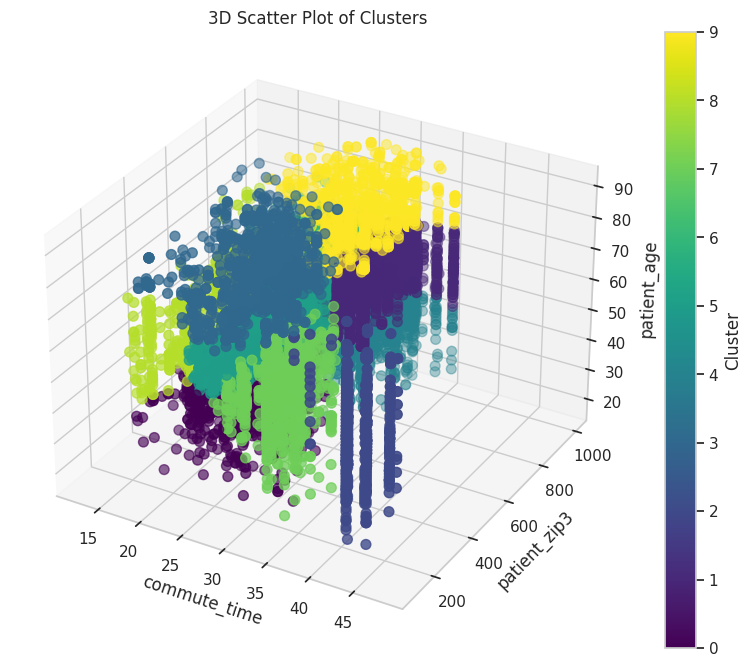

In [54]:
#Visualising the clusters
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is your training data
X_train_selected = df_train_median[["commute_time","patient_zip3","patient_age"]]

# Fit and transform with PCA and KMeansClusterer
clusterer_with_pca.fit(X_train_selected)
X_transformed = clusterer_with_pca.transform(X_train_selected)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points colored by cluster
scatter = ax.scatter(X_transformed["commute_time"], X_transformed["patient_zip3"], X_transformed["patient_age"], c=X_transformed["Cluster"], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel("commute_time")
ax.set_ylabel("patient_zip3")
ax.set_zlabel("patient_age")
ax.set_title('3D Scatter Plot of Clusters')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>ASSEMBLING THE PIPELINE</b></div>

With reference to notebook: https://www.kaggle.com/code/vrushalimanka/wids-datathon-eda-baseline-model/notebook
We will also drop high VIF columns.
- 'male',
- 'education_college_or_above',
- 'income_household_150_over',
- 'rent_median'

VIF, or Variance Inflation Factor, is a statistical measure used to assess multicollinearity in a regression analysis. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. When multicollinearity is present, it can lead to several issues, including inflated standard errors, unstable coefficient estimates, and difficulty in interpreting the model.

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
from sklearn.pipeline import Pipeline

named_preprocessing_pipeline = Pipeline([
    ('IsNan', IsNanTransformer(columns=['bmi','metastatic_first_novel_treatment','patient_race','payer_type'])),
    ('medianimpute', MissingDataImputer(strategy='median', columns=numerical_cols)), 
    ('modeimpute', MissingDataImputer(strategy='mode', columns=categorical_cols)),
    ('age_binning', PAgeBinning(7)),
    ('environment_interact', ENV_Transformer()),
    ('Population_per_Physician', Phys_per_Pop()),
    ('Population_per_Hospital', Hos_per_Pop()),
    ('State_Division', State_DivisionTransformer()),
    #('BC_Zip_Code' ,BC_ZipTransformer()),
    ('kmeans', KMeansClusterer(features=["commute_time","patient_zip3","patient_age"], n_clusters=10, random_state=123, n_components=3)),
    ('textprocessor', TextPreprocessor(columns=['breast_cancer_diagnosis_desc'])),
    #('TFIDFprocessor', TFIDFPCATransformer(column='breast_cancer_diagnosis_desc', max_features=1000, n_components=5)),
    ('drop', DropColumn(cols=[
        'patient_id',
        #'patient_race', 
        'payer_type', 
        #'bmi',
        'metastatic_first_novel_treatment',
        'metastatic_first_novel_treatment_type',
        #'breast_cancer_diagnosis_code',
        #'breast_cancer_diagnosis_desc',
        #'patient_state',
        #'Region',
        'patient_gender',
        #'Division',
        #'metastatic_cancer_diagnosis_code'
    ]
                        #+ geo_demo_list
                       )),
    
    ('prep', ColumnTransformer([
        ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
         list(set(categorical_cols).union([
             'QCut7_patient_age',
             #'BC_Zip_Interaction',
             'Cluster',
             'State_Div'])# Add feature engineered columns
              #- set(geo_demo_list)
              - set([
                  'patient_id',
                  #'patient_race', 
                  'payer_type', 
                  #'bmi',
                  'metastatic_first_novel_treatment',
                  'metastatic_first_novel_treatment_type',
                  #'breast_cancer_diagnosis_code',
                  #'breast_cancer_diagnosis_desc',
                  #'patient_state',
                  #'Region',
                  'patient_gender',
                  #'Division',
                  #'metastatic_cancer_diagnosis_code'
              ]) # Exclude columns that were dropped.
              )),],
        remainder='passthrough').set_output(transform='pandas')),
    
    ('replacedouble', ReplaceDoubleUnderscores()),  # Add the ReplaceDoubleUnderscores transformer after encoding
    ('rename_columns', RenameColumns(replace_dict))  # Add the RenameColumns transformer
])

named_preprocessing_pipeline  



Pipeline(steps=[('IsNan',
                 IsNanTransformer(columns=['bmi',
                                           'metastatic_first_novel_treatment',
                                           'patient_race', 'payer_type'])),
                ('medianimpute',
                 MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'ag...
                                                   'metastatic_cancer_diagnosis_code',
                                                   'Cluster', 'Division',
                                                   'QCut7_patient_age',
                                                   'patient_race',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc',
                                                   'breast_cancer_diagnosis_code',
                                                   'Region'])])),
                ('replacedouble',
                 <__main__.ReplaceDoubleUnderscores object at 0x796a648fb880>),
                ('rename_columns',
                 RenameColumns(replace_dict={32: '_', 40: '_', 41: '_', 44: '_',
                                             58: '_', 91: '_', 93: '_'}))])

In [57]:
X = train.drop(['DiagPeriodL90D'], axis=1) 
y = train['DiagPeriodL90D']

In [58]:
#checking output on train df
df_train = named_preprocessing_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Columns: 112 entries, encode_State_Div to remainder_text_upperouter
dtypes: float64(106), int64(6)
memory usage: 11.0 MB


In [59]:
df_train.head()

,encode_State_Div,encode_metastatic_cancer_diagnosis_code,encode_Cluster,encode_Division,encode_QCut7_patient_age,encode_patient_race,encode_patient_state,encode_breast_cancer_diagnosis_desc,encode_breast_cancer_diagnosis_code,encode_Region,remainder_patient_zip3,remainder_patient_age,remainder_bmi,remainder_population,remainder_density,remainder_age_median,remainder_age_under_10,remainder_age_10_to_19,remainder_age_20s,remainder_age_30s,remainder_age_40s,remainder_age_50s,remainder_age_60s,remainder_age_70s,remainder_age_over_80,remainder_male,remainder_female,remainder_married,remainder_divorced,remainder_never_married,remainder_widowed,remainder_family_size,remainder_family_dual_income,remainder_income_household_median,remainder_income_household_under_5,remainder_income_household_5_to_10,remainder_income_household_10_to_15,remainder_income_household_15_to_20,remainder_income_household_20_to_25,remainder_income_household_25_to_35,remainder_income_household_35_to_50,remainder_income_household_50_to_75,remainder_income_household_75_to_100,remainder_income_household_100_to_150,remainder_income_household_150_over,remainder_income_household_six_figure,remainder_income_individual_median,remainder_home_ownership,remainder_housing_units,remainder_home_value,remainder_rent_median,remainder_rent_burden,remainder_education_less_highschool,remainder_education_highschool,remainder_education_some_college,remainder_education_bachelors,remainder_education_graduate,remainder_education_college_or_above,remainder_education_stem_degree,remainder_labor_force_participation,remainder_unemployment_rate,remainder_self_employed,remainder_farmer,remainder_race_white,remainder_race_black,remainder_race_asian,remainder_race_native,remainder_race_pacific,remainder_race_other,remainder_race_multiple,remainder_hispanic,remainder_disabled,remainder_poverty,remainder_limited_english,remainder_commute_time,remainder_health_uninsured,remainder_veteran,remainder_Ozone,remainder_PM25,remainder_N02,remainder_Hospital_Count,remainder_Physician_Count,remainder_bmi_is_nan,remainder_metastatic_first_novel_treatment_is_nan,remainder_patient_race_is_nan,remainder_payer_type_is_nan,remainder_ENV_Interact,remainder_Phys_per_Pop,remainder_Hos_per_Pop,remainder_text_areola,remainder_text_axillary,remainder_text_breast,remainder_text_central,remainder_text_female,remainder_text_left,remainder_text_lowerinner,remainder_text_lowerouter,remainder_text_male,remainder_text_malignant,remainder_text_neoplasms,remainder_text_nipple,remainder_text_overlap,remainder_text_portion,remainder_text_quadrant,remainder_text_right,remainder_text_secondary,remainder_text_sites,remainder_text_specified,remainder_text_tail,remainder_text_unspecified,remainder_text_upperinner,remainder_text_upperouter
0,5.0,41.0,9.0,5.0,6.0,4.0,4.0,42.0,48.0,3.0,924,84,28.19,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.100000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,19.100000,24563.57143,44.585714,8674.500000,2.646343e+05,1165.000000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,3.0,32.0,1,1,1,0,8407.933786,101.788455,9.542668,0.0,0.0,0.242252,0.000000,0.242590,0.000000,0.0,0.0,0.0,0.242233,0.242233,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.415967,0.0,0.0,0.769469,0.000000,0.000000
1,5.0,3.0,1.0,5.0,4.0,4.0,4.0,12.0,29.0,3.0,928,62,28.49,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.503030,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.

In [60]:
#checking output on test df
df_test = pd.DataFrame(named_preprocessing_pipeline.transform(test))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Columns: 112 entries, encode_State_Div to remainder_text_upperouter
dtypes: float64(106), int64(6)
memory usage: 4.9 MB


In [61]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)
    
    
class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [62]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('IsNan',
                 IsNanTransformer(columns=['bmi',
                                           'metastatic_first_novel_treatment',
                                           'patient_race', 'payer_type'])),
                ('medianimpute',
                 MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'ag...
                                                   'metastatic_cancer_diagnosis_code',
                                                   'Cluster', 'Division',
                                                   'QCut7_patient_age',
                                                   'patient_race',
                                                   'patient_state',
                                                   'breast_cancer_diagnosis_desc',
                                                   'breast_cancer_diagnosis_code',
                                                   'Region'])])),
                ('replacedouble',
                 <__main__.ReplaceDoubleUnderscores object at 0x796a648fb880>),
                ('rename_columns',
                 RenameColumns(replace_dict={32: '_', 40: '_', 41: '_', 44: '_',
                                             58: '_', 91: '_', 93: '_'})),
                ('scale', RobustScaler())])

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5A |</span></b> <b>MODEL: XGBOOST</b></div>

In [63]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

In [64]:
# # XGBoost baseline model
# xgb_model = XGBClassifier()

# xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
# xgb_pipeline

In [65]:
#XGBoost best parameters {'max_depth': 8, 'min_child_weight': 2, 'learning_rate': 0.018519453248392475, 'n_estimators': 337, 'subsample': 0.5135251503383577, 'colsample_bytree': 0.7526183406770304, 'random_state': 2024}
xgb_params_optuna = {'max_depth': 8, 
                     'min_child_weight': 2, 
                     'learning_rate': 0.018519453248392475, 
                     'n_estimators': 337, 
                     'subsample': 0.5135251503383577, 
                     'colsample_bytree': 0.7526183406770304, 
                     'random_state': 2024}

# XGBoost model
xgb_model = XGBClassifier(**xgb_params_optuna)

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
xgb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('IsNan',
                                  IsNanTransformer(columns=['bmi',
                                                            'metastatic_first_novel_treatment',
                                                            'patient_race',
                                                            'payer_type'])),
                                 ('medianimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.018519453248392475, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=2, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=337, n_jobs=None,
                               num_parallel_tree=None, random_state=2024, ...))])

In [66]:
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import f1_score, roc_auc_score

# # Number of folds
# n_splits = 10

# # Adjusting parameters of StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]
    
#     xgb_pipeline.fit(X_train, y_train)

#     # Predictions on the validation set
#     y_val_pred_prob = xgb_pipeline.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
#     y_pred = xgb_pipeline.predict(X_val)
        
#     f1 = f1_score(y_val, y_pred, average='weighted')

#     # Evaluating the model
#     roc_auc = roc_auc_score(y_val, y_val_pred_prob)
#     print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
#     print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
#     print('-' * 70)

#     # Results
#     cv_results.append(roc_auc)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


In [67]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import  confusion_matrix

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# xgb_pipeline.fit(X = X_train,
#                 y = y_train)

# predictions_xgb = xgb_pipeline.predict(X_val)

# cm_xgb = confusion_matrix(y_val, predictions_xgb)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No diag in 90 days', 'diag in 90 days'])
# disp.plot()
# plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5B |</span></b> <b>MODEL: LGBM</b></div>

In [68]:
#lgb library
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [69]:
# #LGBM Best parameters:  {'max_depth': 7, 'min_child_samples': 6, 'learning_rate': 0.02191719337627, 'n_estimators': 363, 'subsample': 0.10164328596111163, 'colsample_bytree': 0.2724803854784814, 'reg_alpha': 0.9886143568941244, 'reg_lambda': 0.7401744152838904}
lgbm_params_optuna =  {'max_depth': 7, 
                       'min_child_samples': 6, 
                       'learning_rate': 0.02191719337627, 
                       'n_estimators': 363, 
                       'subsample': 0.10164328596111163, 
                       'colsample_bytree': 0.2724803854784814, 
                       'reg_alpha': 0.9886143568941244, 
                       'reg_lambda': 0.7401744152838904}
    
# lgbm model
lgbm_model = LGBMClassifier(**lgbm_params_optuna)

lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)
lgbm_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('IsNan',
                                  IsNanTransformer(columns=['bmi',
                                                            'metastatic_first_novel_treatment',
                                                            'patient_race',
                                                            'payer_type'])),
                                 ('medianimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_...
                                 ('rename_columns',
                                  RenameColumns(replace_dict={32: '_', 40: '_',
                                                              41: '_', 44: '_',
                                                              58: '_', 91: '_',
                                                              93: '_'})),
                                 ('scale', RobustScaler())])),
                ('lgbmclassifier',
                 LGBMClassifier(colsample_bytree=0.2724803854784814,
                                learning_rate=0.02191719337627, max_depth=7,
                                min_child_samples=6, n_estimators=363,
                                reg_alpha=0.9886143568941244,
                                reg_lambda=0.7401744152838904,
                                subsample=0.10164328596111163))])

In [70]:
# from sklearn.metrics import log_loss

# # folds
# n_splits = 10

# # StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# cv_results = []


# for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):

#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]

#     lgbm_pipeline.fit(X_train,y_train)

#     y_val_pred_prob = lgbm_pipeline.predict_proba(X_val)
#     y_pred = lgbm_pipeline.predict(X_val)
        
#     f1=  f1_score(y_val, y_pred, average='weighted')

#     # Evaluating the model
#     logloss = log_loss(y_val, y_val_pred_prob)
#     roc_auc = roc_auc_score(y_val, y_pred)
#     print(f'Fold {fold + 1}, AUC-Score on Validation Set: {roc_auc}')
#     print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
#     print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
#     print('-'*70)

#     cv_results.append(roc_auc)
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_result}')

In [71]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# lgbm_pipeline.fit(X = X_train,
#                 y = y_train)

# predictions_lgbm = lgbm_pipeline.predict(X_val)

# cm_lgbm = confusion_matrix(y_val, predictions_lgbm)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=['No diag in 90 days', 'diag in 90 days'])
# disp.plot()
# plt.show()

In [72]:
#Checking for columns with non-JSON compliant characters
# import re

# # Define a regular expression pattern to match non-JSON compliant characters
# json_compliant_pattern = re.compile(r'[^a-zA-Z0-9_\.+\-]')

# # Identify columns with non-JSON compliant characters
# problematic_columns = [col for col in df_train.columns if json_compliant_pattern.search(col)]

# print("Columns with non-JSON compliant characters:")
# print(problematic_columns)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5C |</span></b> <b>MODEL: CATBOOST</b></div>

In [73]:
#catboost library
from catboost import CatBoostClassifier

In [74]:
# catboost_params_optuna = {'iterations': 999, 'depth': 12, 'min_data_in_leaf': 2, 'learning_rate': 0.008470985222690939}
catboost_params_optuna = {
    'iterations': 999, 
    'depth': 12, 
    'min_data_in_leaf': 2, 
    'learning_rate': 0.008470985222690939,
    'eval_metric': 'AUC',
    'verbose': False,
    'loss_function': 'Logloss',}

# catboost model
cb_model = CatBoostClassifier(**catboost_params_optuna, random_state=42)


cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('IsNan',
                                  IsNanTransformer(columns=['bmi',
                                                            'metastatic_first_novel_treatment',
                                                            'patient_race',
                                                            'payer_type'])),
                                 ('medianimpute',
                                  MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       'age_30s', 'age_40s', 'age_...
                                                                    'breast_cancer_diagnosis_desc',
                                                                    'breast_cancer_diagnosis_code',
                                                                    'Region'])])),
                                 ('replacedouble',
                                  <__main__.ReplaceDoubleUnderscores object at 0x796a648fb880>),
                                 ('rename_columns',
                                  RenameColumns(replace_dict={32: '_', 40: '_',
                                                              41: '_', 44: '_',
                                                              58: '_', 91: '_',
                                                              93: '_'})),
                                 ('scale', RobustScaler())])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x796a93bf3250>)])

In [75]:
# n_splits = 10

# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


# cv_results_LL = []
# cv_results_AUC = []


# for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]

    
#     cb_pipeline.fit(X_train,y_train)

#     y_val_pred_prob = cb_pipeline.predict_proba(X_val)
#     y_pred = cb_pipeline.predict(X_val)
        
#     f1=  f1_score(y_val, y_pred, average='weighted')

#     # Evaluating the model
#     logloss = log_loss(y_val, y_val_pred_prob)
#     roc_auc = roc_auc_score(y_val, y_pred)
#     print(f'Fold {fold + 1}, AUC- score on Validation Set: {roc_auc}')
#     print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
#     print(f'Fold {fold + 1}, Log Loss Score on Validation Set: {logloss}')
#     print('-'*70)

 
#     cv_results_LL.append(logloss)
#     cv_results_AUC.append(roc_auc)

# average_cv_LL_result = sum(cv_results_LL) / n_splits
# average_cv_AUC_result = sum(cv_results_AUC) / n_splits


# print(f'\nAverage AUC-SCORE across {n_splits} folds: {average_cv_AUC_result}')
# print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_LL_result}')



In [76]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# cb_pipeline.fit(X = X_train,
#                 y = y_train)

# predictions_cb = cb_pipeline.predict(X_val)

# cm_cb = confusion_matrix(y_val, predictions_cb)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm_cb, display_labels=['No diag in 90 days', 'diag in 90 days'])
# disp.plot()
# plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5C |</span></b> <b>MODEL: TENSORFLOW</b></div>

In [77]:
# from sklearn.base import ClassifierMixin
# import tensorflow as tf

In [78]:
# class TensorFlower(BaseEstimator, ClassifierMixin):
    
#     def fit(self, x, y):
#         inputs = tf.keras.Input((x.shape[1]))
#         inputs_norm = tf.keras.layers.BatchNormalization()(inputs)
        
#         z = tf.keras.layers.Dense(32)(inputs_norm)
#         z = tf.keras.layers.BatchNormalization()(z)
#         z = tf.keras.layers.LeakyReLU()(z)
#         #z = tf.keras.layers.Dropout(.4)(z)
        
#         z = tf.keras.layers.Dense(64)(z)
#         z = tf.keras.layers.BatchNormalization()(z)
#         z = tf.keras.layers.LeakyReLU()(z)
#         #z = tf.keras.layers.Dropout(.4)(z)
        
#         z = tf.keras.layers.Dense(16)(z)
#         z = tf.keras.layers.BatchNormalization()(z)
#         z = tf.keras.layers.LeakyReLU()(z)
#         #z = tf.keras.layers.Dropout(.4)(z)
        
#         z = tf.keras.layers.Dense(4)(z)
#         z = tf.keras.layers.BatchNormalization()(z)
#         z = tf.keras.layers.LeakyReLU()(z)
#         #z = tf.keras.layers.Dropout(.4)(z)
        
#         z = tf.keras.layers.Dense(1)(z)
#         z = tf.keras.layers.BatchNormalization()(z)
#         outputs = tf.keras.activations.sigmoid(z)
        
#         self.model = tf.keras.Model(inputs, outputs)
#         self.model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.AdamW(1e-4))
        
#         self.model.fit(x.to_numpy(), y, epochs = 10, verbose = 0)
#         self.classes_ = np.unique(y)
        
#         return self
#     def predict_proba(self, x):
#         predictions = np.zeros((len(x), 2))
#         predictions[:, 1] = self.model.predict(x, verbose = 0)[:, 0]
#         predictions[:, 0] = 1 - predictions[:, 1]
#         return predictions
#     def predict(self, x):
#         return np.argmax(self.predict_proba(x), axis = 1)

In [79]:
# TF_pipeline = make_pipeline(
#     modelling_pipeline, 
#     TensorFlower())

# TF_pipeline

In [80]:
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import f1_score, roc_auc_score

# # Number of folds
# n_splits = 10

# # Adjusting parameters of StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]
    
#     TF_pipeline.fit(X_train, y_train)

#     # Predictions on the validation set
#     y_val_pred_prob = TF_pipeline.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
#     y_pred = TF_pipeline.predict(X_val)
        
#     f1 = f1_score(y_val, y_pred, average='weighted')

#     # Evaluating the model
#     roc_auc = roc_auc_score(y_val, y_val_pred_prob)
#     print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
#     print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
#     print('-' * 70)

#     # Results
#     cv_results.append(roc_auc)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>EVALUATION</b></div>

## Permutation Importance

In [81]:
# from sklearn.inspection import permutation_importance

In [82]:
# %time
# result = permutation_importance(xgb_pipeline, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2)

In [83]:
# # Sort the importances
# sorted_importances_idx = result.importances_mean.argsort()
# importances = pd.DataFrame(
#     result.importances[sorted_importances_idx].T,
#     columns=df_train.columns[sorted_importances_idx],
# )

# # Create a larger figure
# fig, ax = plt.subplots(figsize=(30, 30))  # Adjust the figsize as needed

# # Create the box plot
# importances.plot.box(vert=False, whis=10, ax=ax)
# ax.set_title("Permutation Importances (Validation set)")
# ax.axvline(x=0, color="k", linestyle="--")
# ax.set_xlabel("Decrease in accuracy score")
# ax.figure.tight_layout()

# # Show the plot
# plt.show()

## Feature Importance -XGB

In [84]:
# xgb_pipeline.fit(X , y )

# TOP = 50

# feature_importance = xgb_model.feature_importances_

# # Get the feature names from 'train'
# feature_names = df_train.columns

# # Sort the feature importances and get the indices of the sorted array
# sorted_idx = np.argsort(feature_importance)

# # Plot only the top 'TOP' features
# fig = plt.figure(figsize=(20, 20))
# plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
# plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
# plt.title(f'Feature Importance - Top {TOP}')
# plt.show()

## Feature Importance -LGBM

In [85]:
# lgbm_pipeline.fit(X , y )

# TOP = 50

# feature_importance = lgbm_model.feature_importances_

# # Get the feature names from 'train'
# feature_names = df_train.columns

# # Sort the feature importances and get the indices of the sorted array
# sorted_idx = np.argsort(feature_importance)

# # Plot only the top 'TOP' features
# fig = plt.figure(figsize=(20, 20))
# plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
# plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
# plt.title(f'Feature Importance - Top {TOP}')
# plt.show()

## Feature Importance -CatBoost

In [86]:
# cb_pipeline.fit(X , y )

# TOP = 50

# feature_importance = cb_model.feature_importances_

# # Get the feature names from 'train'
# feature_names = df_train.columns

# # Sort the feature importances and get the indices of the sorted array
# sorted_idx = np.argsort(feature_importance)

# # Plot only the top 'TOP' features
# fig = plt.figure(figsize=(20, 20))
# plt.barh(np.arange(len(sorted_idx))[-TOP:], feature_importance[sorted_idx][-TOP:], align='center')
# plt.yticks(np.arange(len(sorted_idx))[-TOP:], feature_names[sorted_idx][-TOP:])
# plt.title(f'Feature Importance - Top {TOP}')
# plt.show()

## SHAP values

In [87]:
# import shap

# # Create a pipeline that includes your preprocessing steps and the XGBoost model
# combined_pipeline = Pipeline([
#     ('preprocessing', modelling_pipeline),
#     ('xgboost', xgb_model)
# ])

# # Assuming 'X_val' is your validation set
# X_val_preprocessed = combined_pipeline.named_steps['preprocessing'].transform(X_val)

# # Create a new SHAP explainer
# explainer = shap.Explainer(combined_pipeline.named_steps['xgboost'], X_val_preprocessed)

# # Calculate SHAP values
# shap_values = explainer.shap_values(X_val_preprocessed)

# # Summarize the effects of all the features
# shap.summary_plot(shap_values, X_val_preprocessed, max_display=TOP)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7A |</span></b> <b>SUBMISSION: BASELINE</b></div>

In [88]:
# # Fit the ensemble final model
# xgb_pipeline.fit(X, y)

# # Create submission file with probability predictions
# predictions = xgb_pipeline.predict_proba(test)[:, 1]  # Use the probabilities of class 1

# sample_submission['DiagPeriodL90D'] = predictions
# sample_submission.to_csv('submission_baseline.csv', index=False)

In [89]:
# sample_submission.head()

In [90]:
# plt.figure(figsize = (12, 6), dpi = 150)
# sns.kdeplot(sample_submission.DiagPeriodL90D, fill = True)
# plt.title("Distribution of 'DiagPeriodL90D' Probability", weight = 'bold', size = 10)
# plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7B |</span></b> <b>SUBMISSION: ENSEMBLE</b></div>

In [91]:
from sklearn.ensemble import VotingClassifier

In [92]:
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_pipeline),
    ('lgb', lgbm_pipeline),
    ('cb', cb_pipeline),
    #('tf', TF_pipeline)
        
]
                                  , voting='soft',
                                  weights = [1,1,1]) 

ensemble_model

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('IsNan',
                                                                IsNanTransformer(columns=['bmi',
                                                                                          'metastatic_first_novel_treatment',
                                                                                          'patient_race',
                                                                                          'payer_type'])),
                                                               ('medianimpute',
                                                                MissingDataImputer(columns=Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19'...
                                                                                                  'breast_cancer_diagnosis_code',
                                                                                                  'Region'])])),
                                                               ('replacedouble',
                                                                <__main__.ReplaceDoubleUnderscores object at 0x796a648fb880>),
                                                               ('rename_columns',
                                                                RenameColumns(replace_dict={32: '_',
                                                                                            40: '_',
                                                                                            41: '_',
                                                                                            44: '_',
                                                                                            58: '_',
                                                                                            91: '_',
                                                                                            93: '_'})),
                                                               ('scale',
                                                                RobustScaler())])),
                                              ('catboostclassifier',
                                               <catboost.core.CatBoostClassifier object at 0x796a93bf3250>)]))],
                 voting='soft', weights=[1, 1, 1])

In [93]:
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import f1_score, roc_auc_score

# # Number of folds
# n_splits = 10

# # Adjusting parameters of StratifiedKFold
# stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Cross-validation results
# cv_results = []

# # Stratified k-fold cross-validation
# for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y)):
#     X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]
    
#     ensemble_model.fit(X_train, y_train)

#     # Predictions on the validation set
#     y_val_pred_prob = ensemble_model.predict_proba(X_val)[:, 1]  # Predict probabilities for class 1
#     y_pred = ensemble_model.predict(X_val)
        
#     f1 = f1_score(y_val, y_pred, average='weighted')
    

#     # Evaluating the model
#     roc_auc = roc_auc_score(y_val, y_val_pred_prob)
#     print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
#     print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
#     print('-' * 70)

#     # Results
#     cv_results.append(roc_auc)

# # Average cross-validation result
# average_cv_result = sum(cv_results) / n_splits
# print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


Average AUC-score across 10 folds: 0.7977969779034342

In [94]:
# Fit the ensemble final model
ensemble_model.fit(X, y)

# Create submission file with |probability predictions
predictions = ensemble_model.predict_proba(test)[:, 1]  # Use the probabilities of class 1

sample_submission['DiagPeriodL90D'] = predictions
sample_submission.to_csv('submission_ensemble.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8060, number of negative: 4846
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18949
[LightGBM] [Info] Number of data points in the train set: 12906, number of used features: 112
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624516 -> initscore=0.508760
[LightGBM] [Info] Start training from score 0.508760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [95]:
sample_submission.head(10)

,patient_id,DiagPeriodL90D
0,573710,0.895730
1,593679,0.711955
2,184532,0.781777
3,447383,0.739524
4,687972,0.889642
5,281312,0.054618
6,492714,0.895720
7,378266,0.864179
8,291550,0.775898
9,612272,0.871332


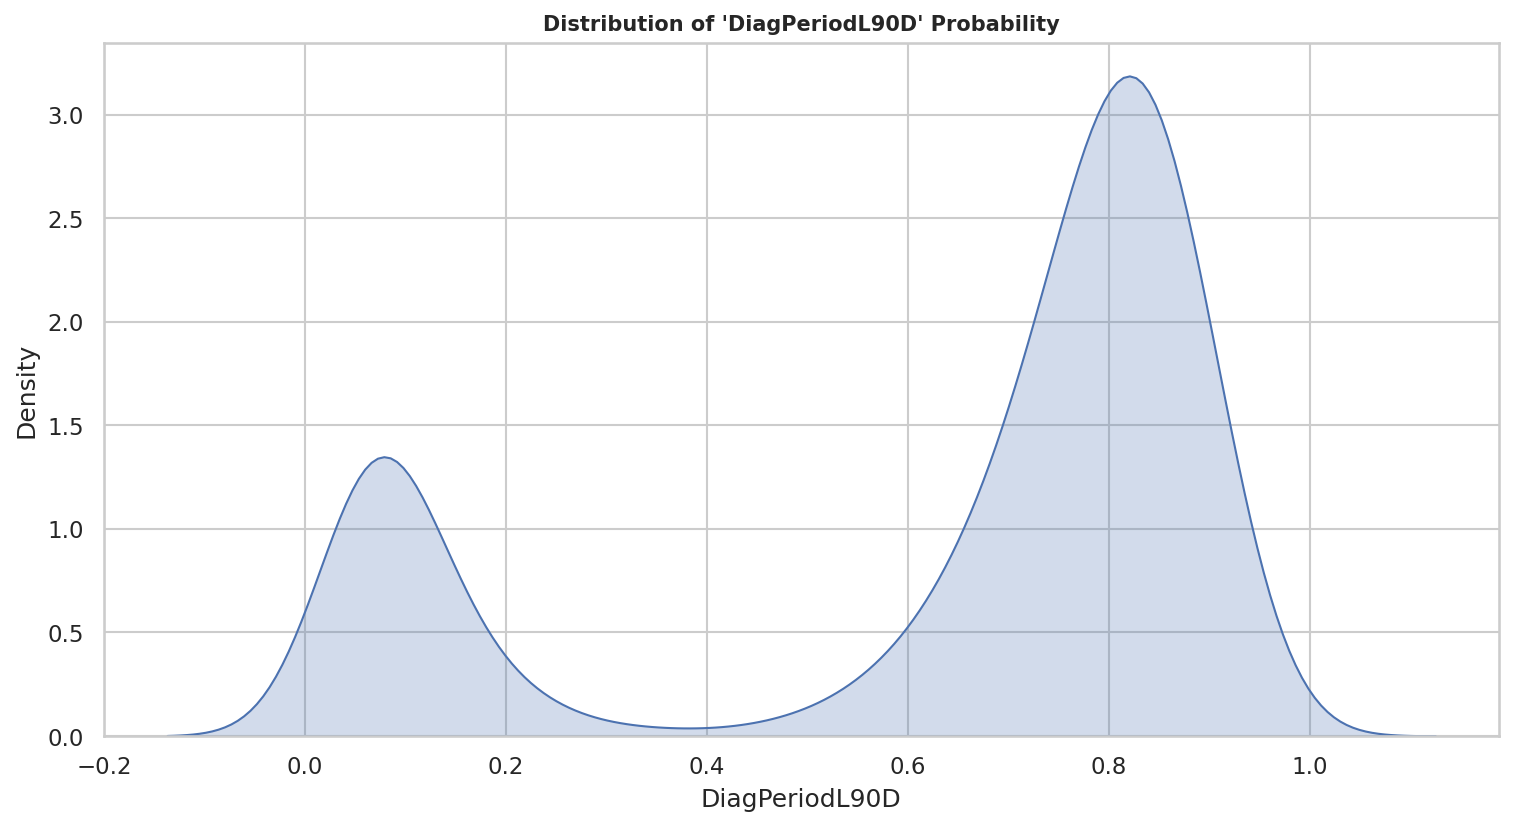

In [96]:
plt.figure(figsize = (12, 6), dpi = 150)
sns.kdeplot(sample_submission.DiagPeriodL90D, fill = True)
plt.title("Distribution of 'DiagPeriodL90D' Probability", weight = 'bold', size = 10)
plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>8 |</span></b> <b>HYPERPARAMETER TUNING</b></div>


## XGB Hyperparameter Tuning

In [97]:
# import optuna
# from sklearn.model_selection import  cross_val_score
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.metrics import f1_score, roc_auc_score

# import warnings
# # Set global warning filter
# warnings.filterwarnings("ignore")

In [98]:
# import xgboost as xgb

# def objective_xgb(trial):
#     """Define the objective function for XGBClassifier"""

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.01, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
#         'random_state': trial.suggest_categorical('random_state', [2024]),
#         'tree_method': 'gpu_hist',  # Use GPU for tree building, oterwise use 'hist'
#         'device' : 'cuda',
#         'eval_metric': 'auc',  # Evaluation metric
#         'verbosity': 2,  # Set verbosity to 0 for less output
#     }

#     xgb_model = xgb.XGBClassifier(**params)
#     xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)

#     cv = abs(cross_val_score(xgb_pipeline, X, y, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Define a pruning callback for Optuna
# def pruning_callback(study, trial):
#     if study.best_trial.number != trial.number:
#         # Prune if the trial is not the current best
#         if study.trials[trial.number].intermediate_values:
#             last_value = max(study.trials[trial.number].intermediate_values.values())
#             if last_value < study.best_value:
#                 raise optuna.TrialPruned()
            
# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_xgb, n_trials=50, callbacks=[pruning_callback])

# # Get the best parameters
# best_params_xgb = study.best_params
# print("Best Hyperparameters for XGBoost:", best_params_xgb)

Best Hyperparameters for XGBoost: {'max_depth': 8, 'min_child_weight': 2, 'learning_rate': 0.018519453248392475, 'n_estimators': 337, 'subsample': 0.5135251503383577, 'colsample_bytree': 0.7526183406770304, 'random_state': 2024} Best is trial 49 with value: 0.8019576233543642.

## LGBM Hyperparameter Tuning

In [99]:
# # Define a pruning callback for Optuna
# def pruning_callback(study, trial):
#     if study.best_trial.number != trial.number:
#         # Prune if the trial is not the current best
#         if study.trials[trial.number].intermediate_values:
#             last_value = max(study.trials[trial.number].intermediate_values.values())
#             if last_value < study.best_value:
#                 raise optuna.TrialPruned()

# def objective_lgbm(trial):
#     """Define the objective function for LGBMClassifier"""

#     params = {
#         'objective': 'binary',  # Objective for binary classification
#         'boosting_type': 'gbdt',
#         'device': 'gpu',
#         'metric': 'auc',  # Evaluation metric
#         'max_depth': trial.suggest_int('max_depth', 5, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
#         'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'random_state': 2024,
#     }

#     lgb_model = lgb.LGBMClassifier(**params)
#     lgb_pipeline = make_pipeline(modelling_pipeline, lgb_model)

#     # Assuming 'trainX' and 'trainy' are your training data
#     cv = abs(cross_val_score(lgb_pipeline, X, y, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_lgbm, n_trials=50, callbacks=[pruning_callback])

# # Get the best parameters
# best_params_lgb = study.best_params
# print("Best Hyperparameters for LGBM:", best_params_lgb)

Best Hyperparameters for LGBM: {'max_depth': 7, 'min_child_samples': 6, 'learning_rate': 0.02191719337627, 'n_estimators': 363, 'subsample': 0.10164328596111163, 'colsample_bytree': 0.2724803854784814, 'reg_alpha': 0.9886143568941244, 'reg_lambda': 0.7401744152838904} Best is trial 11 with value: 0.8048682503063945.

## CATBoost Hyperparameter Tuning

In [100]:
# # Suppress FutureWarnings related to is_sparse
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)

# def objective(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 500, 1000),
#         'depth': trial.suggest_int('depth', 4, 16),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 2, 20),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.2, log=True),
#     }
    
#     cb_model = CatBoostClassifier(**params, random_state=2024, grow_policy='Lossguide', verbose=0)
#     cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
    

#     cv = abs(cross_val_score(cb_pipeline, X, y, cv=skf, scoring='roc_auc').mean())
#     return cv

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# best_params_cb = study.best_params
# print("Best Hyperparameters for CatBoost:", best_params_cb)

Best Hyperparameters for CatBoost: {'iterations': 999, 'depth': 12, 'min_data_in_leaf': 2, 'learning_rate': 0.008470985222690939} Best is trial 21 with value: 0.8046032057325025.


## Ensemble Weights Hyperparameter Tuning

In [101]:
# # Define the parameter search space
# def objective(trial):
#     weight_xgb = trial.suggest_float('weight_xgb', 0, 2)  # Adjust the range based on your expectations
#     weight_lgb = trial.suggest_float('weight_lgb', 0, 2)
    
#     # Calculate the sum of weights
#     total_weight = weight_xgb + weight_lgb
    
#     # Normalize the weights to ensure they sum to 1
#     weight_xgb /= total_weight
#     weight_lgb /= total_weight
    
#     # Calculate the weight for CatBoost
#     weight_cb = 1.0 - weight_xgb - weight_lgb

#     weights = [weight_xgb, weight_lgb, weight_cb]

#     ensemble_model = VotingClassifier(
#         estimators=[
#             ('xgb', xgb_pipeline),
#             ('lgb', lgbm_pipeline),
#             ('cb', cb_pipeline)
#         ], voting='soft', weights=weights)

#     # Assuming 'trainX' and 'trainy' are your training data
#     cv = abs(cross_val_score(ensemble_model, X, y, cv=skf, scoring='roc_auc').mean())

#     return cv

# # Assuming 'skf' is your StratifiedKFold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Use the 'sampler' parameter for parallelization
# study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=2024))
# study.optimize(objective, n_trials=30)

# best_weights = study.best_params
# print("Best Weights for Ensemble:", best_weights)


Trial 11 finished with value: 0.8003973738116041 and parameters: {'weight_xgb': 0.015094638632585866, 'weight_lgb': 1.9082436426216445}. Best is trial 11 with value: 0.8003973738116041.

In [102]:
# weight_xgb= 0.015094638632585866
# weight_lgb= 1.9082436426216445

# total_weight = weight_xgb + weight_lgb
    
# # Normalize the weights to ensure they sum to 1
# weight_xgb /= total_weight
# weight_lgb /= total_weight
    
# # Calculate the weight for CatBoost
# weight_cb = 1.0 - weight_xgb - weight_lgb

# weights = [weight_xgb, weight_lgb, weight_cb]
# weights